### 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
### Import timeseries files from github https://github.com/CSSEGISandData/COVID-19


In [1]:
import pandas as pd
from pandas import DataFrame

#Import timeseries files from github https://github.com/CSSEGISandData/COVID-19
#2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

path_confirmed = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
path_deaths =('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


df_conf = pd.read_csv(path_confirmed)
df_death = pd.read_csv(path_deaths)

df_conf.to_csv (r'Daten/confirmed_cases.csv', index = False, header=True) 
df_death.to_csv (r'Daten/death.csv', index = False, header=True) 


In [14]:
import pandas as pd
from pandas import DataFrame

#from beakerx import *
#from beakerx.object import beakerx

df_conf = pd.read_csv('Daten/confirmed_cases.csv')
df_death = pd.read_csv('Daten/death.csv')

df_conf

In [3]:
df_conf[(df_conf['Country/Region']=='Switzerland')]


/opt/conda/lib/python3.7/site-packages/beakerx/tabledisplay/tabledisplay.py:114: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  index_values = args[0].index.get_values()[index]


In [3]:
df_error =df_conf[['Country/Region','3/11/20','3/12/20']]
#df_error =df_conf[['Country/Region','3/22/20','3/23/20']]

df_error = df_error[(df_error['3/11/20'] == df_error['3/12/20']) & df_error['3/11/20'] > 0 ]
#df_error = df_error[(df_error['3/22/20'] == df_error['3/23/20']) & df_error['3/22/20'] > 0 ]
df_error.head(10)

### Unpivot Data and String to Date


In [20]:
#Confirmed Cases
df_conf_unpiv = df_conf.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='cases')
df_conf_unpiv['date']= pd.to_datetime(df_conf_unpiv['date']).dt.strftime('%Y/%m/%d')

#Deaths
df_death_unpiv = df_death.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='deaths')
df_death_unpiv['date']= pd.to_datetime(df_death_unpiv['date']).dt.strftime('%Y/%m/%d')

df_conf_unpiv.head(10)
#df_death_unpiv.head(10)

In [21]:
df_merge = pd.merge(df_conf_unpiv, df_death_unpiv, left_on=['date','Country/Region','Province/State'], right_on=['date','Country/Region','Province/State'])
#df_merge = pd.merge(df_merge, df_recov_unpiv, left_on=['date','Country/Region','Province/State'], right_on=['date','Country/Region','Province/State'])
df_merge = df_merge.filter(['Country/Region','Province/State','date','cases','deaths'])

df_merge = df_merge.groupby(['Country/Region','date'])['cases','deaths'].sum().reset_index()
df_merge
df_merge[df_merge['Country/Region']=='US'].tail(10)
                                                    

/opt/conda/lib/python3.7/site-packages/beakerx/tabledisplay/tabledisplay.py:114: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  index_values = args[0].index.get_values()[index]


In [22]:
df_cases=pd.DataFrame(df_merge.groupby('Country/Region')['cases'].max())
df_cases.sort_values(by='cases', ascending=False).head(20)

In [23]:

'''#country_list = ['Austria','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Czech Republic','Denmark','Estonia','Finland','France',
                'Germany','Greece','Hungary','Island','Ireland','Italy','Netherlands','Norway','Noth Macedonia','Norway','Poland','Portugal',
                'Republic of Ireland','Romania','Spain','Slovenia','Slovakia','Sweden','Switzerland','UK']
'''
#,'San Marino'
#country_list = ['Mainland China']
#country_list = ['Italy']
#country_list = ['Korea, South']
#country_list = ['Iran']
#country_list = ['Japan']
country_list = ['Switzerland']
#country_list = ['Ireland']
#country_list = ['Germany']
#country_list = ['Spain']
#country_list = ['France']

#country_list = ['US']

#country_list = ['United Kingdom']


df_europe = df_merge[df_merge['Country/Region'].isin(country_list)]


#df_europe = df_europe.groupby(['Country/Region','Province/State','date'])['cases','deaths','recovered'].max().reset_index()
#df_europe = df_europe.groupby(['Country/Region','date'])['cases','deaths','recovered'].sum().reset_index()

#df_europe['death_rate'] = df_europe['deaths']/df_europe['cases']
#df_europe['death_rate2'] = df_europe['deaths']/(df_europe['deaths'] + df_europe['recovered'])
df_europe = df_europe[df_europe['cases']>=1]
df_europe


### Confirmed Cases

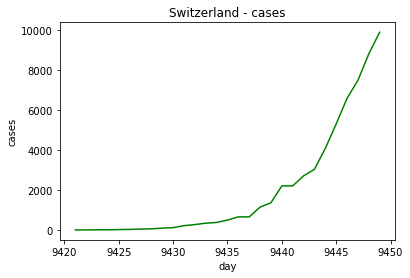

In [24]:
import matplotlib.pyplot as plt
import numpy as np

faelle = 'cases'

plt.plot(df_europe.index,df_europe[faelle], color = 'green')
plt.title(' '.join(country_list) + ' - ' + faelle)
plt.xlabel('day')
plt.ylabel(faelle)
plt.show()



In [11]:
import datetime
dayfilter = df_europe[(df_europe['date'] == datetime.date(2020,3,11))].index
dayfilter

df_europe.loc[df_europe['date'] == datetime.date(2020,3,12), "cases"] = 858
#df_europe

/opt/conda/lib/python3.7/site-packages/beakerx/tabledisplay/tabledisplay.py:109: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  value = args[0][columnName].get_values()[index]


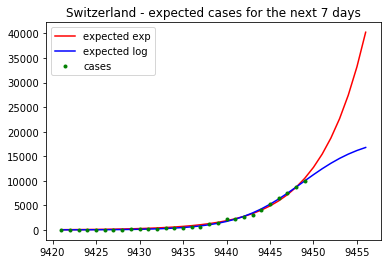

In [25]:

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def exponential_model(x, a, k, b):
    return a*np.exp(x*k) + b

def exponential(x,a,b,c):
    return a*np.exp(b*(x-c))


def logistic(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))


funktion = exponential

zeilen= df_europe['cases'].count()

x_array =np.arange(0, zeilen )
x_date = df_europe['date'].values

faelle = 'cases'

y_array_exp = df_europe[faelle].values

poptE, pcovE  = curve_fit(exponential, x_array, y_array_exp,p0=[1,1,1])
poptL, pcovL  = curve_fit(logistic, x_array, y_array_exp,p0=[2.5,3,0])


expdays = 7
x_array = np.arange(0, zeilen + expdays)
plt.figure

plt.plot(x_array+min(df_europe.index), exponential(x_array, *poptE), 'r-',label='expected exp')
plt.plot(x_array+min(df_europe.index), logistic(x_array, *poptL), 'b-',label='expected log')

plt.plot(df_europe.index,df_europe[faelle] ,".", color = 'green',label=faelle  )
plt.title(''.join(country_list) + ' - expected ' + faelle +' for the next ' + str(expdays) + ' days' )
plt.legend()

#land_pred = ([x_date,y_array_exp, exponential(x_array, *poptE).astype('int')] )
land_pred = ([x_date,y_array_exp, exponential(x_array, *poptE).astype('int'),logistic(x_array, *poptL).astype('int')] )
land_pred = pd.DataFrame(land_pred).T


#land_pred.columns = (['date',faelle,'expected'])
#land_pred['expected'] = land_pred.expected.astype('int')
land_pred.columns = (['date',faelle,'expected','expected log'])

#land_pred = land_pred.fillna(method='pad')
#land_pred=land_pred.interpolate()
land_pred.tail(14)



In [15]:
from sklearn.metrics import r2_score

r2_score(y_array_exp, funktion(x_array, *poptE)[:zeilen])

0.9946718198601849

### Deaths

In [40]:
df_death_max = df_death_unpiv.groupby('Country/Region')['deaths'].max()
pd.DataFrame(df_death_max.sort_values(ascending=False))

,deaths
Country/Region,
Italy,5476.0
China,3153.0
Spain,1772.0
Iran,1685.0
France,674.0
...,...
Guadeloupe,0.0
Niger,0.0
Nicaragua,0.0
